### Boosting

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix, plot_roc_curve, accuracy_score, mean_absolute_error,mean_squared_error

In [2]:
df = pd.read_csv('./dataset/mushrooms.csv')

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


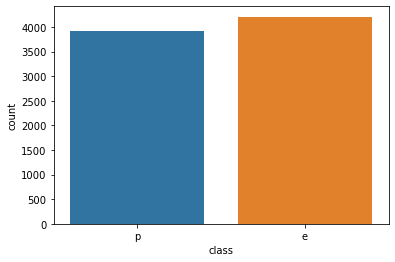

In [4]:
sns.countplot(data = df, x = 'class')

In [5]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [6]:
feat_uni = df.describe().transpose().reset_index().sort_values('unique')

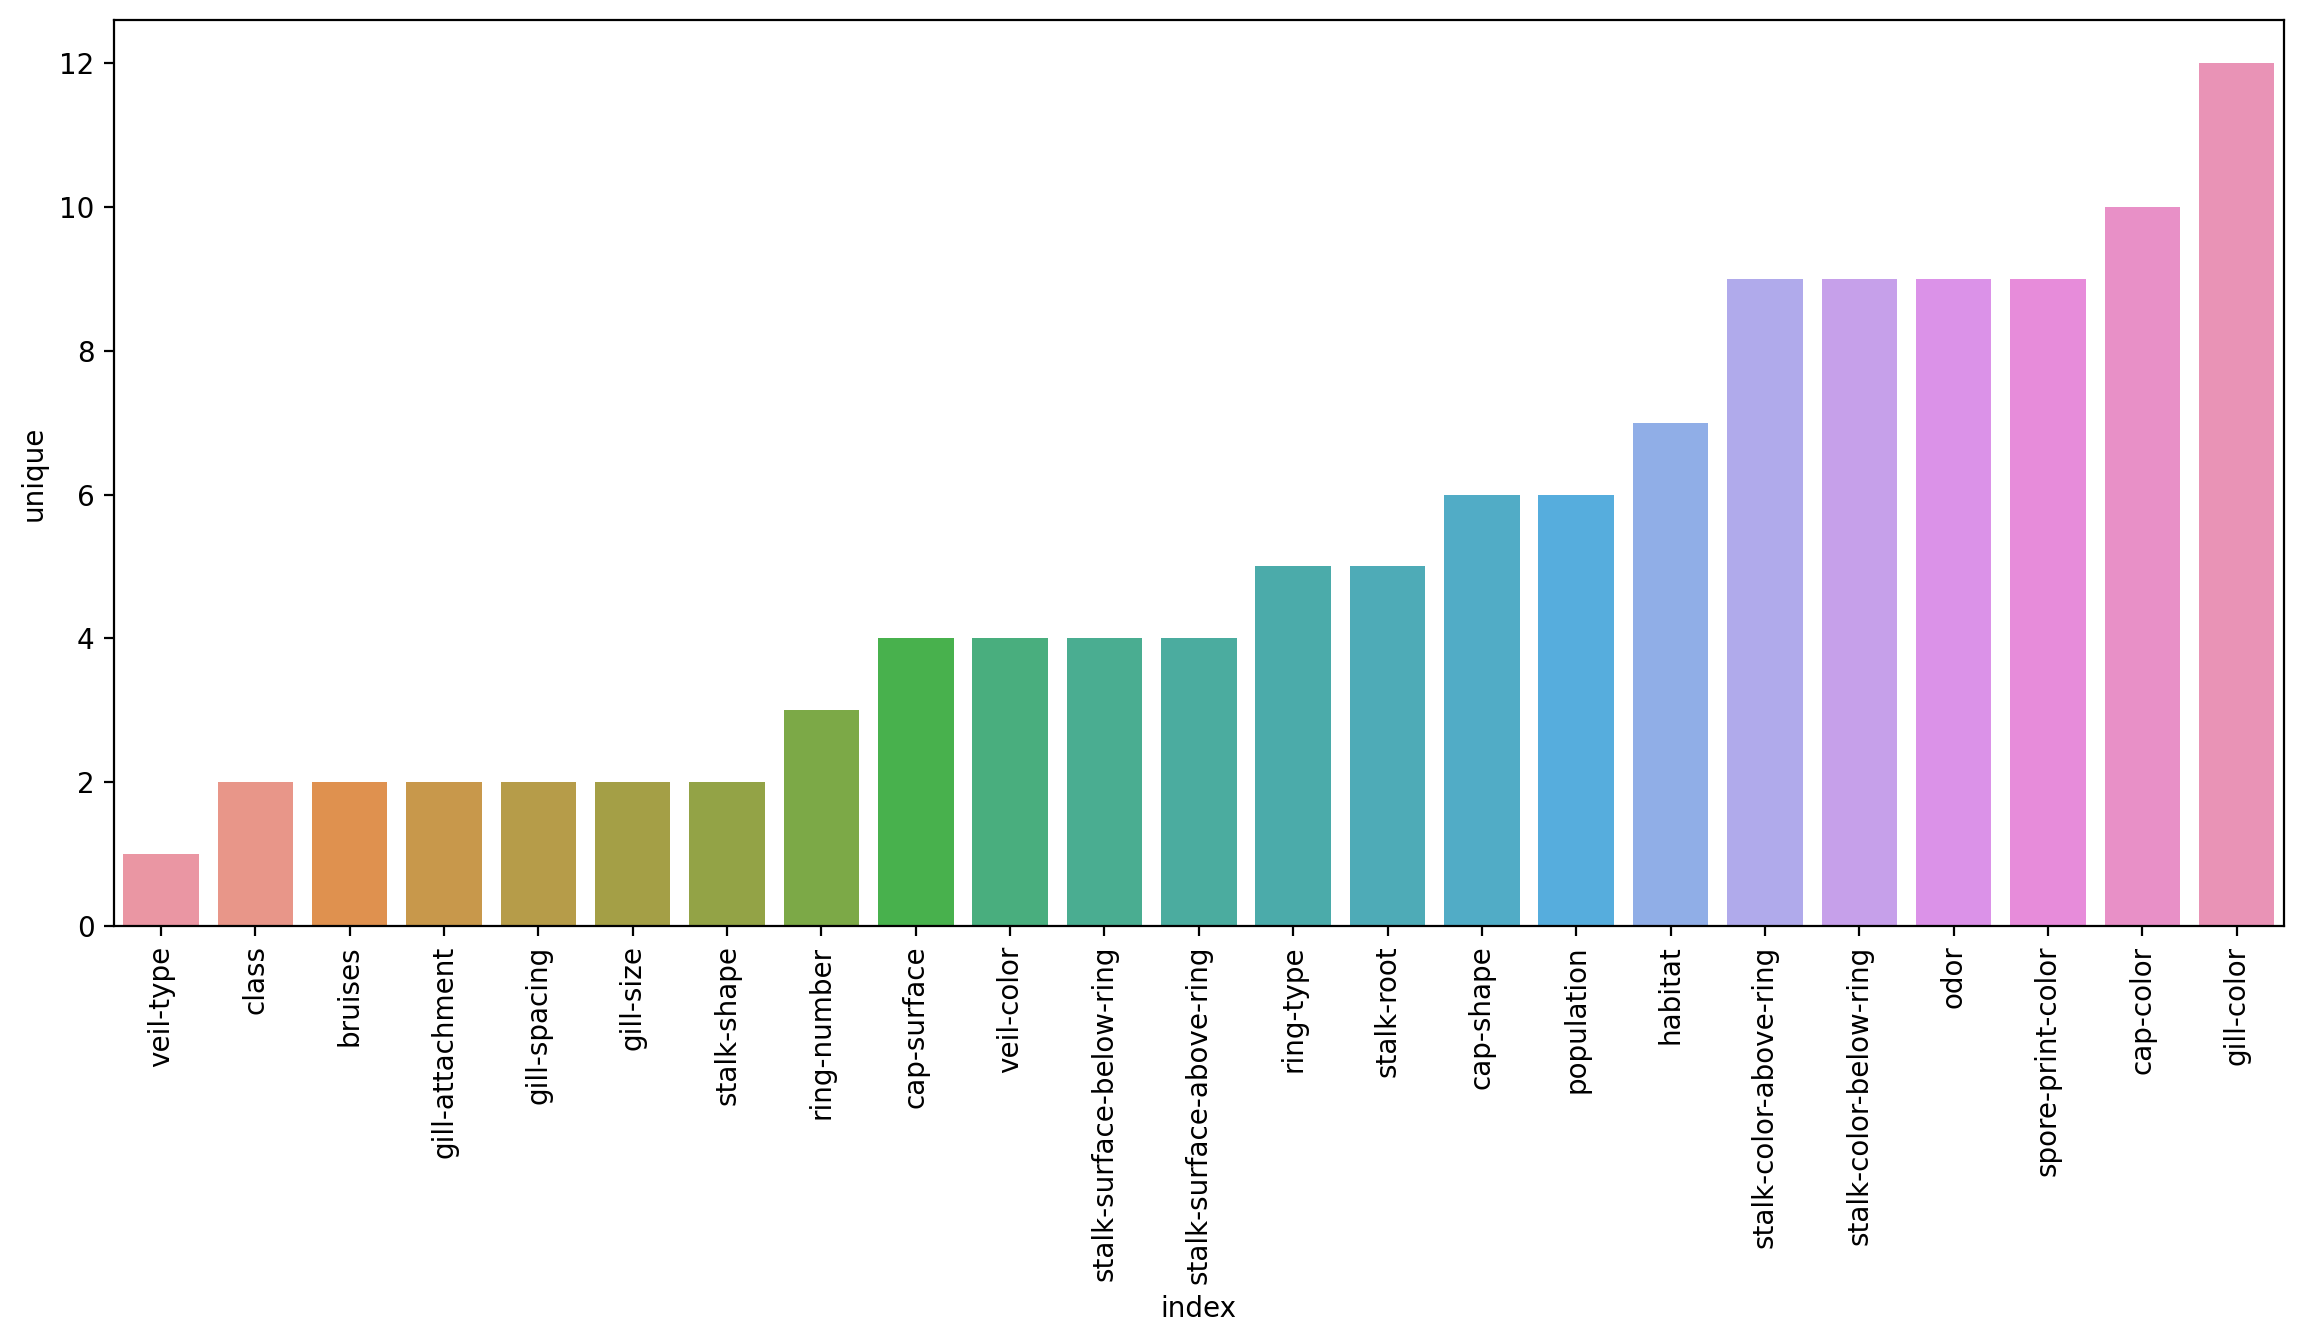

In [7]:
plt.figure(figsize=(14, 6), dpi = 200)
sns.barplot(data = feat_uni, x = 'index', y = 'unique')
plt.xticks(rotation = 90);

In [8]:
X = df.drop('class', axis=1)

In [9]:
X = pd.get_dummies(X, drop_first = True)

In [10]:
y = df['class']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [12]:
from sklearn.ensemble import AdaBoostClassifier

In [13]:
model = AdaBoostClassifier(n_estimators=1)

In [14]:
model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=1)

In [15]:
predictions = model.predict(X_test)

In [16]:
predictions

array(['p', 'e', 'p', ..., 'p', 'p', 'e'], dtype=object)

In [17]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           e       0.96      0.81      0.88       655
           p       0.81      0.96      0.88       564

    accuracy                           0.88      1219
   macro avg       0.88      0.88      0.88      1219
weighted avg       0.89      0.88      0.88      1219



In [18]:
model.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [19]:
model.feature_importances_.argmax()

22

In [20]:
X.columns[22]

'odor_n'

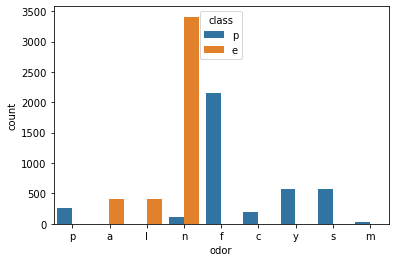

In [21]:
sns.countplot(data = df, x='odor', hue='class')

In [22]:
feats = pd.DataFrame(index = X.columns, data = model.feature_importances_, columns = ['Importance'])

In [23]:
feats

,Importance
cap-shape_c,0.0
cap-shape_f,0.0
cap-shape_k,0.0
cap-shape_s,0.0
cap-shape_x,0.0
...,...
habitat_l,0.0
habitat_m,0.0
habitat_p,0.0
habitat_u,0.0


In [27]:
imp_feats = feats[feats['Importance']>0]

In [28]:
imp_feats

,Importance
odor_n,1.0


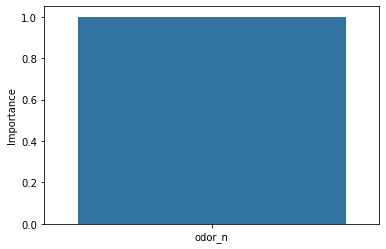

In [29]:
sns.barplot(data = imp_feats, x=imp_feats.index, y = 'Importance')

### Gradient Boosting

In [ ]:
pd.read_csv('./dataset/')

In [31]:
param_grid = {
    'n_estimators':[50, 100],
    'learning_rate':[0.1, 0.05, 0.2],
    'max_depth': [3, 4, 5]
}

In [32]:
gb_model = GradientBoostingClassifier()

In [33]:
grid = GridSearchCV(gb_model, param_grid)

In [34]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.05, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 100]})

In [36]:
predictions = grid.predict(X_test)

In [37]:
predictions

array(['p', 'e', 'p', ..., 'p', 'p', 'e'], dtype=object)

In [38]:
grid.best_estimator_

GradientBoostingClassifier()

In [39]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

In [40]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       655
           p       1.00      1.00      1.00       564

    accuracy                           1.00      1219
   macro avg       1.00      1.00      1.00      1219
weighted avg       1.00      1.00      1.00      1219



In [42]:
# Feature importances
grid.best_estimator_.feature_importances_

array([2.91150176e-04, 8.46882913e-17, 2.26482114e-17, 0.00000000e+00,
       1.04572855e-16, 1.04652037e-03, 9.00384981e-18, 3.78276239e-06,
       0.00000000e+00, 0.00000000e+00, 4.82631158e-18, 0.00000000e+00,
       7.50590766e-17, 5.28274034e-21, 0.00000000e+00, 2.22085607e-08,
       2.49999634e-03, 5.31412064e-02, 1.84253604e-04, 1.39480834e-02,
       1.82499853e-02, 2.46783181e-05, 6.14744334e-01, 8.63939501e-03,
       0.00000000e+00, 0.00000000e+00, 2.62963075e-21, 1.27126988e-02,
       1.07415714e-02, 0.00000000e+00, 3.26201539e-16, 9.49789756e-18,
       1.39855033e-17, 0.00000000e+00, 0.00000000e+00, 2.11182124e-17,
       8.99708233e-17, 4.57837496e-22, 4.20587896e-17, 0.00000000e+00,
       4.39922283e-04, 1.37355809e-03, 1.35976519e-01, 0.00000000e+00,
       2.72373810e-02, 6.21308869e-04, 6.12113083e-06, 5.48883507e-06,
       0.00000000e+00, 8.10118794e-04, 4.20328493e-02, 2.07464254e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [43]:
feat_import = grid.best_estimator_.feature_importances_

In [44]:
imp_feat = pd.DataFrame(index=X.columns,
                       data = feat_import,
                       columns=['Importance'])

In [46]:
imp_feat = imp_feat[imp_feat['Importance']> 0.0005]

In [48]:
imp_feat = imp_feat.sort_values('Importance')

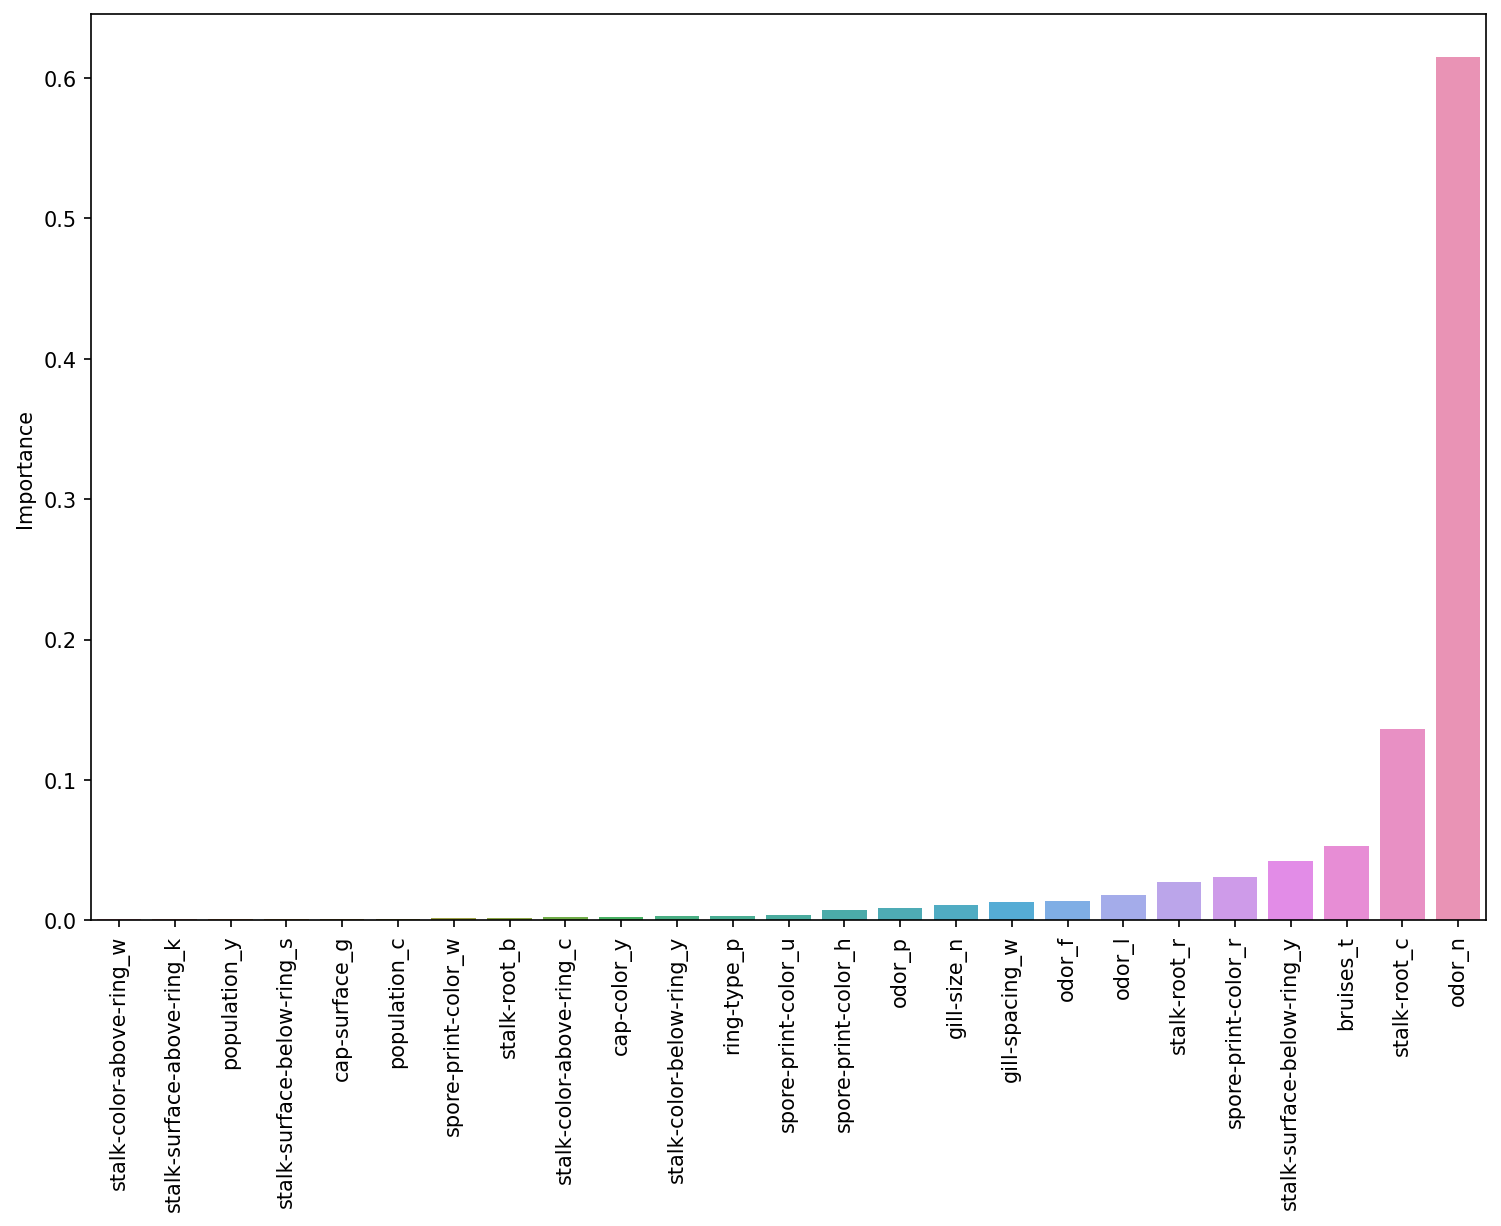

In [51]:
plt.figure(figsize=(12, 8), dpi = 150)
sns.barplot(data = imp_feat,
           x=imp_feat.index,
           y='Importance')
plt.xticks(rotation = 90);